# Homework 4: Probability and Sampling
Reading: Textbook chapter [9](https://www.inferentialthinking.com/chapters/09/Randomness.html).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw04.ok')
_ = ok.auth(inline=True)

Assignment: Homework 4: Probability and Sampling
OK, version v1.18.1

Successfully logged in as a00344428@itesm.mx


**Important**: The `ok` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [ ]:
_ = ok.submit()

## 1. Sampling Basketball Players


This exercise uses salary data and game statistics for basketball players from the 2014-2015 NBA season. The data were collected from [basketball-reference](http://www.basketball-reference.com) and [spotrac](http://www.spotrac.com).

Run the next cell to load the two datasets.

In [2]:
player_data = Table.read_table('player_data.csv')
salary_data = Table.read_table('salary_data.csv')
player_data.show(3)
salary_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


**Question 1.** We would like to relate players' game statistics to their salaries.  Compute a table called `full_data` that includes one row for each player who is listed in both `player_data` and `salary_data`.  It should include all the columns from `player_data` and `salary_data`, except the `"PlayerName"` column.

In [3]:
full_data = player_data.join("Name", salary_data, "PlayerName")
full_data

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
A.J. Price,28,TOT,26,32,46,7,0,14,133,62552
Aaron Brooks,30,CHI,82,166,261,54,15,157,954,1145685
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040
Adreian Payne,23,TOT,32,162,30,19,9,44,213,1855320
Al Horford,28,ATL,76,544,244,68,98,100,1156,12000000
Al Jefferson,30,CHO,65,548,113,47,84,68,1082,13666667
Al-Farouq Aminu,24,DAL,74,342,59,70,62,55,412,1100602
Alan Anderson,32,BRK,74,204,83,56,5,60,545,1276061
Alec Burks,23,UTA,27,114,82,17,5,52,374,3034356
Alex Kirk,23,CLE,5,1,1,0,0,0,4,507336


In [4]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Basketball team managers would like to hire players who perform well but don't command high salaries.  From this perspective, a very crude measure of a player's *value* to their team is the number of points the player scored in a season for every **\$1000 of salary** (*Note*: the `Salary` column is in dollars, not thousands of dollars). For example, Al Horford scored 1156 points and has a salary of 12,000 thousands of dollars, so his value is $\frac{1156}{12000}$.

**Question 2.** Create a table called `full_data_with_value` that's a copy of `full_data`, with an extra column called `"Value"` containing each player's value (according to our crude measure).  Then make a histogram of players' values.  **Specify bins that make the histogram informative, and don't forget your units!**

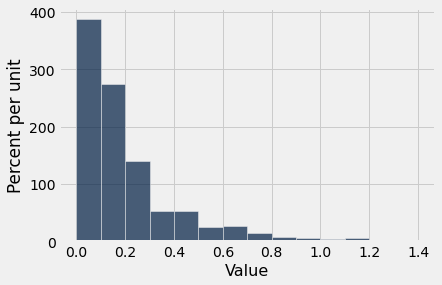

In [25]:
full_data_with_value = full_data.with_column("Value", full_data.column("Points")/(full_data.column("Salary")/1000))
full_data_with_value.hist("Value",bins = np.arange(0,1.5,.1))


Now suppose we weren't able to find out every player's salary.  (Perhaps it was too costly to interview each player.)  Instead, we have gathered a *simple random sample* of 100 players' salaries.  The cell below loads those data.

In [26]:
sample_salary_data = Table.read_table("sample_salary_data.csv")
sample_salary_data.show(3)

PlayerName,Salary
C.J. Watson,2106720
Taj Gibson,8000000
Jerrelle Benimon,35000


**Question 3.** Make a histogram of the values of the players in `sample_salary_data`, using the same method for measuring value we used in question 2.  **Use the same bins, too.**  *Hint:* This will take several steps.

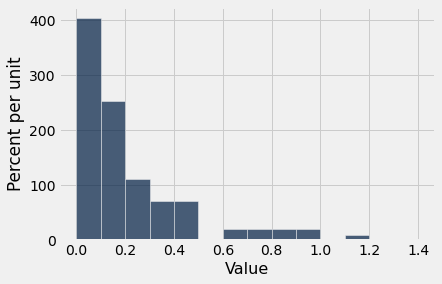

In [30]:
sample_salary_data_with_value = sample_salary_data.join("PlayerName", player_data, "Name")
sample_salary_data_with_value = sample_salary_data_with_value.with_column("Value", sample_salary_data_with_value.column("Points")/(sample_salary_data_with_value.column("Salary")/1000))
sample_salary_data_with_value.hist("Value",bins = np.arange(0,1.5,.1))

Now let us summarize what we have seen.  To guide you, we have written most of the summary already.

**Question 4.** Complete the statements below by filling in the [SQUARE BRACKETS]:

The plot in question 2 displayed a(n) [emperical distribution] histogram of the population of [492] players.  The areas of the bars in the plot sum to [100].

The plot in question 3 displayed a(n) [emperical distribution] histogram of the sample of [100] players.  The areas of the bars in the plot sum to [100].

**Question 5.** For which range of values does the plot in question 3 better depict the distribution of the **population's player values**: 0 to 0.5, or above 0.5? 

The plot in question 3 is better with the range of 0 to 0.5 since there is more data on this range and more variation making it a better depict

## 2. How Many Devices?


When a company produces medical devices, it must be sure that its devices will not fail.  Sampling is used ubiquitously in the medical device industry to test how well devices work.

Suppose you work at a company that produces syringes, and you are responsible for ensuring the syringes work well.  After studying the manufacturing process for the syringes, you have a hunch that they have a 1% failure rate.  That is, you suspect that 1% of the syringes won't work when a doctor uses them to inject a patient with medicine.

To test your hunch, you would like to find at least one faulty syringe.  You hire an expert consultant who can test a syringe to check whether it is faulty.  But the expert's time is expensive, so you need to avoid checking more syringes than you need to.

**Important note:** This exercise asks you to compute numbers that are related to probabilities.  For all questions, you can calculate your answer using algebra, **or** you can write and run a simulation to compute an approximately-correct answer.  (For practice, we suggest trying both.)  An answer based on an appropriate simulation will receive full credit.  If you simulate, use at least **5,000** trials.

**Question 1.** Suppose there is indeed a 1% failure rate among all syringes.  If you check 20 syringes chosen at random from among all syringes, what is the chance that you find at least 1 faulty syringe?  (You may assume that syringes are chosen with replacement from a population in which 1% of syringes are faulty.)  Name your answer `chance_to_find_syringe`.

In [31]:
# For your convenience, we have created a list containing
# 99 copies of the number 0 (to represent good syringes)
# and 1 copy of the number 1 (to represent a bad syringe).
# This may be useful if you run a simulation.  Feel free
# to delete it.
import math

faultiness = np.append(0*np.arange(99), 1)

chance_to_find_syringe = 1-(math.comb(20,0)*0.01**0*0.99**20)
chance_to_find_syringe

0.18209306240276923

In [32]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Continue to assume that there really is a 1% failure rate.  Find the smallest number of syringes you can check so that you have at least a 50% chance of finding a faulty syringe.  (Your answer should be an integer.)  Name that number `num_required_for_50_percent`.  **It's okay if your answer is off by as many as 11 for full credit.**

In [37]:
num_required_for_50_percent = math.ceil(math.log(0.5)/math.log(0.99))
num_required_for_50_percent

69

In [38]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** A doctor purchased 5 syringes and found 4 of them to be faulty. Assuming that there is indeed a 1% failure rate, what was the probability of **exactly 4** out of 5 syringes being faulty? 

In [39]:
probability_of_four_faulty = math.comb(5,4)*0.01**4*0.99**1
probability_of_four_faulty 

4.95e-08

In [40]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Assuming that there is indeed a 1% failure rate, assign `order` to a **list** of the numbers 1 through 7, ordered by the size of the quantities described below from smallest to largest. For example, `order` will start with 2 because list item 2 ("Zero") is the smallest quantity.

1. One half
1. Zero
1. The chance that **zero** out of 5 syringes are faulty.
1. The chance that **at least 1** out of 5 syringes is faulty.
1. The chance that **exactly 4** out of 5 syringes are faulty.
1. The chance that **at least 4** out of 5 syringes are faulty.
1. The chance that **all 5** out of 5 syringes are faulty.

In [41]:
order = [2,7,5,6,4,1,3]

In [42]:
_ = ok.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Predicting Temperatures


In this exercise, we will try to predict the weather in California using the prediction method  discussed in [section 7.1 of the textbook](https://www.inferentialthinking.com/chapters/07/1/applying-a-function-to-a-column.html).  Much of the code is provided for you; you will be asked to understand and run the code and interpret the results.

The US National Oceanic and Atmospheric Administration (NOAA) operates thousands of climate observation stations (mostly in the US) that collect information about local climate.  Among other things, each station records the highest and lowest observed temperature each day.  These data, called "Quality Controlled Local Climatological Data," are publicly available [here](http://www.ncdc.noaa.gov/orders/qclcd/) and described [here](https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/quality-controlled-local-climatological-data-qclcd).

`temperatures.csv` contains an excerpt of that dataset.  Each row represents a temperature reading in Fahrenheit from one station on one day.  (The temperature is actually the highest temperature observed at that station on that day.)  All the readings are from 2015 and from California stations.

In [43]:
temperatures = Table.read_table("temperatures.csv")
temperatures

Temperature,Date,Latitude,Longitude,Station name
67,1013,40.9781,-124.109,Arcata/Eureka
63,811,38.3208,-123.075,Bodega
94,706,39.1019,-121.568,Marysville
59,1211,36.9358,-121.789,Watsonville
111,620,32.8342,-115.579,Imperial
88,821,33.9,-117.25,Riverside
68,606,33.938,-118.389,Los Angeles
66,205,37.2847,-120.513,Merced
89,902,39.49,-121.618,Oroville
105,728,34.8536,-116.786,Daggett


Here is a scatter plot:

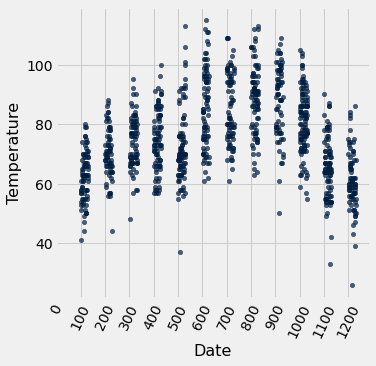

In [44]:
temperatures.scatter("Date", "Temperature")
_ = plots.xticks(np.arange(0, max(temperatures.column('Date')), 100), rotation=65)

Each entry in the column "Date" is a number in MMDD format, meaning that the last two digits denote the day of the month, and the first 1 or 2 digits denote the month.

**Question 1.** Why do the data form vertical bands with gaps?

The data form vertical bands because it is arrange in the way that the first digit or digits are the month. For example 100 = January and 10000= october. The last 2 digits are the day and since there are only up to 31 days in one month, it can not be more that 131 so it forms gaps.

Let us solve that problem.  We will convert each date to the number of days since the start of the year.<br>


**Question 2.** Implement the `get_day_in_month` function. The result should be an integer.<br>
_Hint:_ Use the [remainder operator](https://www.inferentialthinking.com/chapters/03/1/expressions.html).

In [45]:
def get_month(date):
    """The month in the year for a given date.
    
    >>> get_month(315)
    3
    """
    return int(date / 100) # Divide by 100 and round down to the nearest integer

def get_day_in_month(date):
    """The day in the month for a given date.
    
    >>> get_day_in_month(315)
    15
    """
    return int(date%100) 

get_month(315)
get_day_in_month(315)

15

In [46]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Next, we'll compute the *day of the year* for each temperature reading, which is the number of days from January 1 until the date of the reading.

In [47]:
# You don't need to change this cell, but you are strongly encouraged
# to read all of the code and understand it.

days_in_month = make_array(31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)

# A table with one row for each month.  For each month, we have
# the number of the month (e.g. 3 for March), the number of
# days in that month in 2015 (e.g. 31 for March), and the
# number of days in the year before the first day of that month
# (e.g. 0 for January or 59 for March).
days_into_year =  Table().with_columns(
    "Month", np.arange(12)+1,
    "Days until start of month", np.cumsum(days_in_month) - days_in_month)

# First, compute the month and day-of-month for each temperature.
months = temperatures.apply(get_month, "Date")
day_of_month = temperatures.apply(get_day_in_month, "Date")
with_month_and_day = temperatures.with_columns(
    "Month", months,
    "Day of month", day_of_month
)

# Then, compute how many days have passed since 
# the start of the year to reach each date.
t = with_month_and_day.join('Month', days_into_year)
day_of_year = t.column('Days until start of month') + t.column('Day of month')
with_dates_fixed = t.drop(0, 6, 7).with_column("Day of year", day_of_year)
with_dates_fixed

Temperature,Date,Latitude,Longitude,Station name,Day of year
71,127,32.7,-117.2,San Diego,27
61,102,34.1167,-119.117,Point Mugu,2
56,126,40.9781,-124.109,Arcata/Eureka,26
55,111,37.3591,-121.924,San Jose,11
67,127,36.3189,-119.629,Hanford,27
69,130,33.6267,-116.159,Palm Springs,30
67,117,32.7,-117.2,San Diego,17
79,124,33.8222,-116.504,Palm Springs,24
73,116,35.2372,-120.641,San Luis Obispo,16
70,128,39.1019,-121.568,Marysville,28


**Question 3**. Set `missing` to an array of all the days of the year (integers from 1 through 365) that do not have any temperature readings.<br>
*Hint:* One strategy is to start with a table of all days in the year, then use either the predicate `are.not_contained_in` ([docs](http://data8.org/datascience/predicates.html)) or the method `exclude` ([docs](http://data8.org/datascience/_autosummary/datascience.tables.Table.exclude.html#datascience.tables.Table.exclude))  to eliminate all of the days of the year that do have a temperature reading. 

In [51]:
missing = []

for i in np.arange(1,366):
    if((i in with_dates_fixed.column("Day of year"))==False):
        missing.append(i)
    

missing

[14,
 33,
 35,
 57,
 60,
 76,
 80,
 81,
 85,
 96,
 102,
 103,
 130,
 143,
 178,
 181,
 186,
 210,
 215,
 227,
 247,
 258,
 264,
 270,
 272,
 294,
 319,
 344,
 354,
 358]

In [52]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Using `with_dates_fixed`, we can make a better scatter plot.

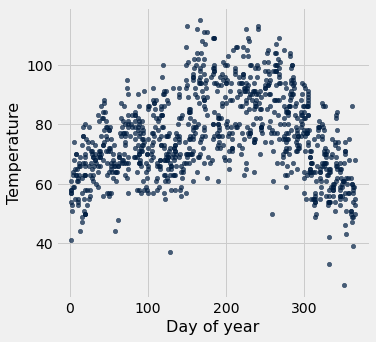

In [53]:
with_dates_fixed.scatter("Day of year", "Temperature")

Let's do some prediction.  For any reading on any day, we will predict its value using all the readings from the week before and after that day.  A reasonable prediction is that the reading will be the average of all those readings.  We will package our code in a function.

In [54]:
def predict_temperature(day):
    """A prediction of the temperature (in Fahrenheit) on a given day at some station.
    """
    nearby_readings = with_dates_fixed.where("Day of year", are.between_or_equal_to(day - 7, day + 7))
    return np.average(nearby_readings.column("Temperature"))

**Question 4.** Suppose you're planning a trip to Yosemite for Thanksgiving break this year, and you'd like to predict the temperature on November 26. Use `predict_temperature` to compute a prediction for a temperature reading on that day.

In [56]:
thanksgiving_prediction = predict_temperature(365-34)
thanksgiving_prediction

63.333333333333336

In [57]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Below we have computed a predicted temperature for each reading in the table and plotted both.  (It may take a **minute or two** to run the cell.)

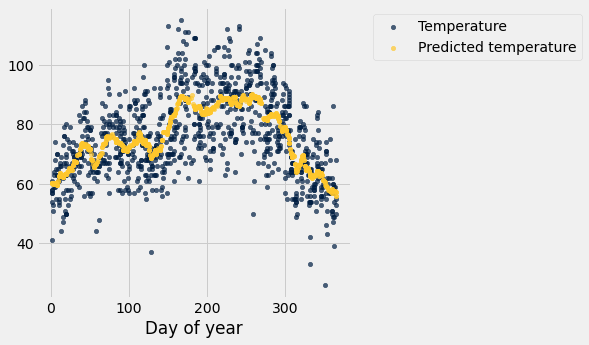

In [58]:
with_predictions = with_dates_fixed.with_column(
    "Predicted temperature",
    with_dates_fixed.apply(predict_temperature, "Day of year"))
with_predictions.select("Day of year", "Temperature", "Predicted temperature")\
                .scatter("Day of year")

**Question 5.** The scatter plot is called a *graph of averages*.  In the [example in the textbook](https://www.inferentialthinking.com/chapters/07/1/applying-a-function-to-a-column.html#Example:-Prediction), the graph of averages roughly followed a straight line.  Is that true for this one?  Using your knowledge about seasons, explain why or why not.

This graph does not follow a straight line due the temperature changes all over the year, in other words because of the change of the seassons we have during all the year. In this continent, at the begging and at the end of the year the temperature are low (winter) and then in the middle it increses (summer). 

**Question 6.** According to the [Wikipedia article](https://en.wikipedia.org/wiki/Climate_of_California) on California's climate, "[t]he climate of California varies widely, from hot desert to subarctic."  Suppose we limited our data to weather stations in a smaller area whose climate varied less from place to place (for example, the state of Vermont, or the San Francisco Bay Area).  

If we made the same graph for that dataset, in what ways would you expect it to look different? Be specific.

That graph would be following a straight line since the variations are less. In this case, the data will be only for a single place where its temperature has fewer variations and not that drastic all over the year. This samples would be closer and it won't have alterations over seasons. 

Once you're finished, select "Save and Checkpoint" in the File menu and then execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [ ]:
_ = ok.submit()

<IPython.core.display.Javascript object>